In [1]:
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

%load_ext autoreload

In [2]:
%autoreload
import sys
sys.path.insert(0, "../")

import pickle
import math as m
import matplotlib
import matplotlib.pyplot as plt

from experiment_utils import plot_history, compare_histories
from rotation_rate_utils import plot_parameter_distances

/home/sicarbonnell/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# actually copied the results from relative learning rate control experiment to avoid re-training same networks
with open('plateaus_in_learning_curves.p','rb') as f: 
    results = pickle.load(f)

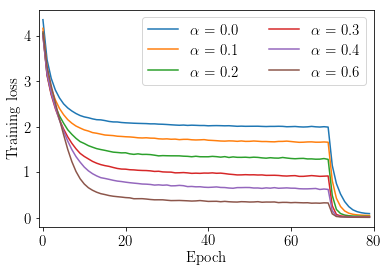

In [4]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

optimizer = 'llc'
alphas = [0.,0.1,0.2,0.3,0.4, 0.6]
for task in ['tinyImagenet']:
    plt.figure()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    for alpha in alphas:
        history = results[task][optimizer][alpha]['history']
        plt.plot(history['epoch'],history['history']['loss'], label = r'$\alpha$ = '+str(alpha))
    plt.legend(ncol=2)
    plt.ylabel('Training loss')
    plt.xlabel('Epoch')
    plt.xlim(-1,80)
    
    plt.savefig('figures/plateaus_'+task+'.eps',format='eps', dpi=200)
#     plt.savefig('figures/plateaus_'+task+'.png',format='png', dpi=300)

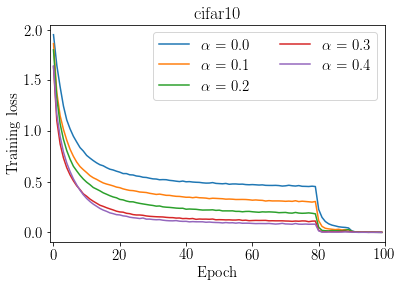

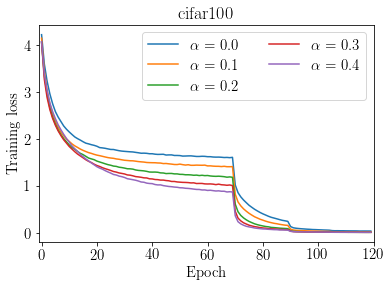

In [23]:
%matplotlib inline

matplotlib.rcParams.update({'font.size': 15})

optimizer = 'llc'
alphas = [0.,0.1,0.2,0.3,0.4]
for task in ['cifar10', 'cifar100']:
    plt.figure()
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    for alpha in alphas:
        history = results[task][optimizer][alpha]['history']
        plt.plot(history['epoch'],history['history']['loss'], label = r'$\alpha$ = '+str(alpha))
    plt.legend(ncol=2)
    plt.ylabel('Training loss')
    plt.xlabel('Epoch')
    plt.xlim(-1,len(history['history']['loss']))
    plt.title(task)
    
    plt.savefig('figures/plateaus_'+task+'.eps',format='eps', dpi=200)